In [1]:
%load_ext autoreload
%autoreload 2

## 0. Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Plot the `mean` and `stdev` of the corner reflectors for a given `burst_id` per `date`

In [3]:
# Define parameters
save_dir = '/mnt/trappist-r0/bato/work/cslc_validation/gamma/ALE/Rosamond/t064_135523_iw2/'
burst_id = 't064_135523_iw2'
cr_network = 'Rosamond'


In [ ]:
# Summary files
outcsv1 = f'ALE_{cr_network}_{burst_id.upper()}.csv'
outcsv2 = f'ALE_{cr_network}_{burst_id.upper()}_ID.csv'

In [4]:
# Read csv results
df = pd.read_csv(f'{save_dir}/summary/{outcsv1}', sep=',', header=3)
del df[df.columns[0]]
df.columns = ['Date','EW_avg','EW_std','NS_avg','NS_std','GRg_avg','GRg_std','Az_avg','Az_std']
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')

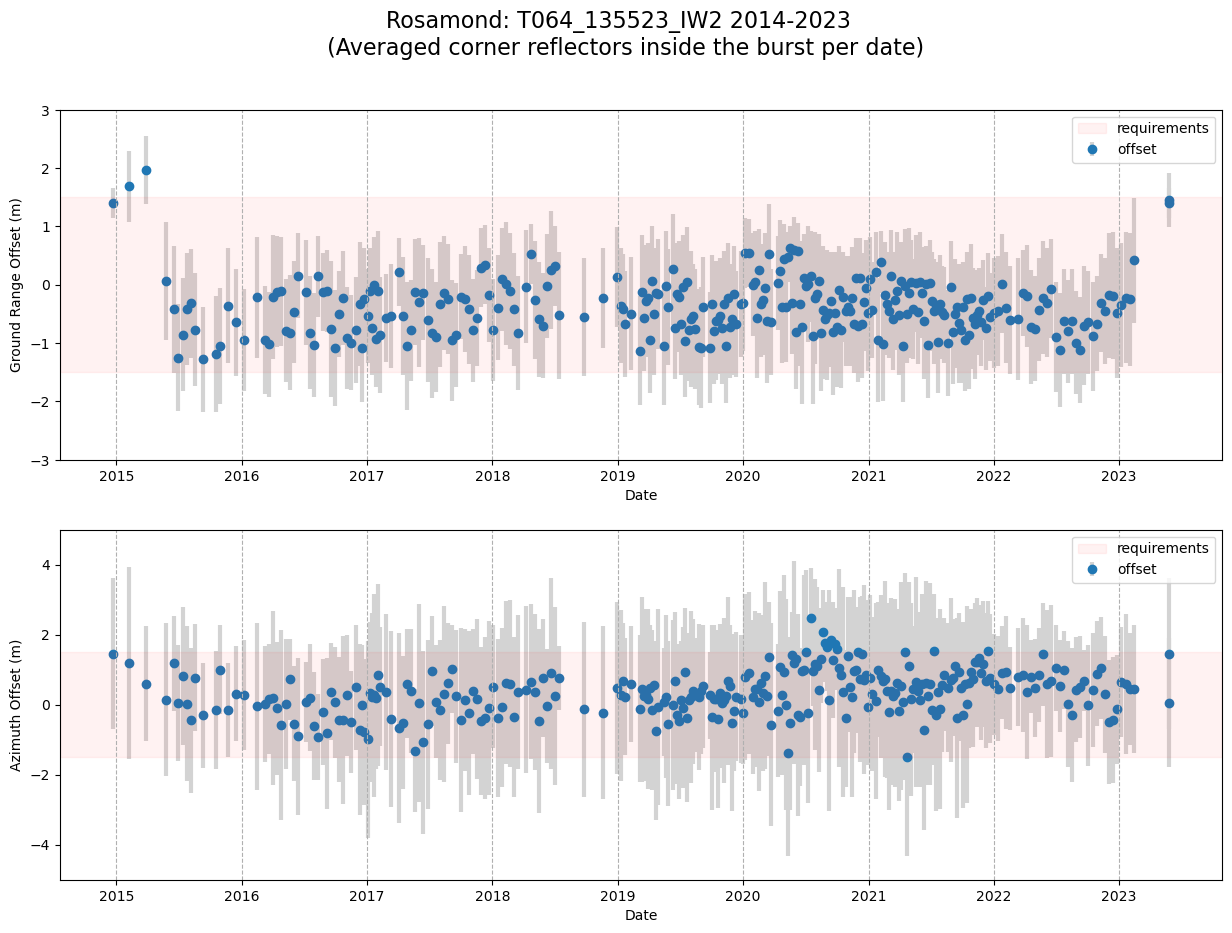

In [5]:
# Plot results
fig, ax = plt.subplots(2,1,figsize=(15,10))
gr_req = ax[0].axhspan(-1.5,1.5,color='red', alpha=0.05, label='requirements')
gr_offset = ax[0].errorbar(df['Date'],df['GRg_avg'],df['GRg_std'],marker='o',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0, label='offset')
ax[0].set_xlabel('Date')
ax[0].set_ylim(-3,3)
ax[0].grid(axis='x',linestyle='--')
ax[0].set_ylabel('Ground Range Offset (m)')
ax[0].legend()

az_req = ax[1].axhspan(-1.5,1.5,color='red', alpha=0.05,label='requirements')
az_offset = ax[1].errorbar(df['Date'],df['Az_avg'],df['Az_std'],marker='o',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0, label='offset')
ax[1].set_xlabel('Date')
ax[1].set_ylim(-5,5)
ax[1].grid(axis='x',linestyle='--')
ax[1].set_ylabel('Azimuth Offset (m)')
ax[1].legend()
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (Averaged corner reflectors inside the burst per date)", fontsize=16)
fig.savefig(f'{save_dir}/summary/ALE_ts_grazi_mean.png',dpi=300,bbox_inches='tight')

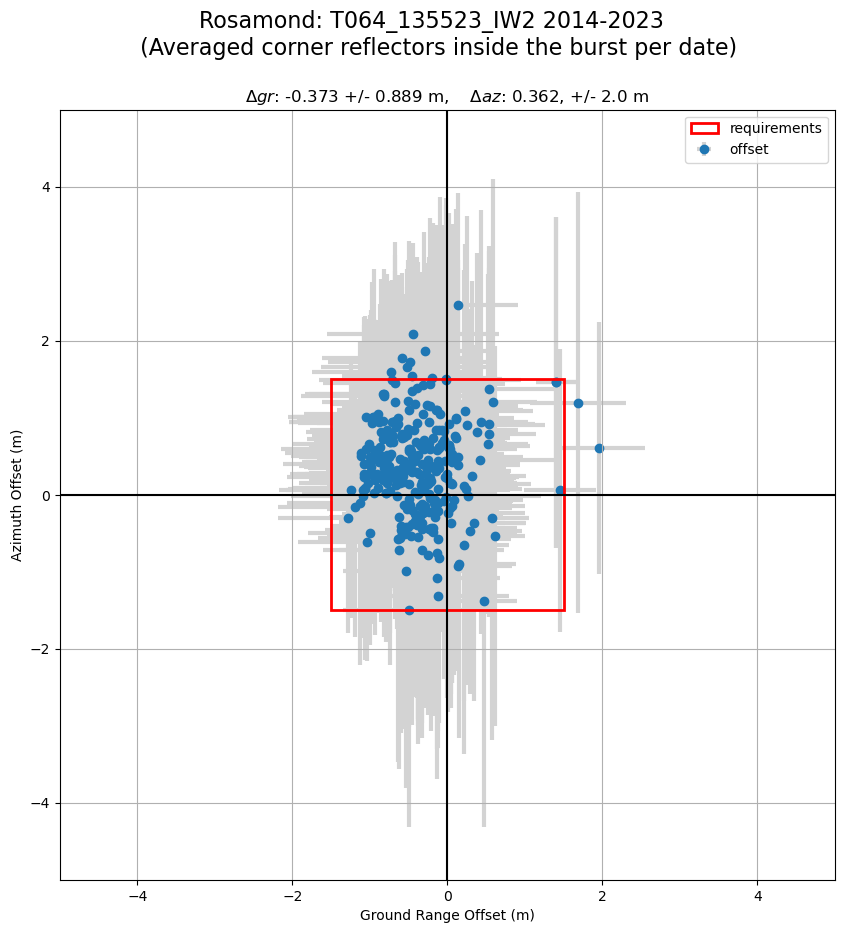

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,10),sharex=True)
ale_req = patches.Rectangle((-1.5, 1.5), 3, -3, linewidth=2, edgecolor='r', facecolor='none',label='requirements')  #OPERA ALE requirements
offset = ax.errorbar(df.GRg_avg, df.Az_avg,xerr=df.GRg_std,yerr=df.Az_std,marker='o',linestyle=' ',ecolor='lightgray', linewidth=3, capsize=0, zorder=0, label='offset')
ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title(f'$\Delta gr$: {np.round(df.GRg_avg.mean(),3)} +/- {np.round(df.GRg_std.mean(),3)} m, \
   $\Delta az$: {np.round(df.Az_avg.mean(),3)}, +/- {np.round(df.Az_std.mean(),3)} m')
ax.set_xlabel('Ground Range Offset (m)')
ax.set_ylabel('Azimuth Offset (m)')
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (Averaged corner reflectors inside the burst per date)", fontsize=16)
ax.add_patch(ale_req)
ax.legend()
fig.savefig(f'{save_dir}/summary/ALE_grazi_mean.png',dpi=300,bbox_inches='tight')

## 2. Plot <span style="color:red">ALL</span> the corner reflectors for a given `burst_id` from `2014-2023`

In [7]:
df = pd.read_csv(f'{save_dir}/summary/{outcsv2}', sep=',')
del df[df.columns[0]]
df.columns = ['ID','lat','lon','hgt','azm','tilt','slen','UTMx','UTMy','xloc','yloc','xloc_subpx','yloc_subpx','xloc_peak','yloc_peak','snr','azi_angle','inc_angle','ALE_EW','ALE_NS','ALE_GRg','ALE_Az','Date']
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')

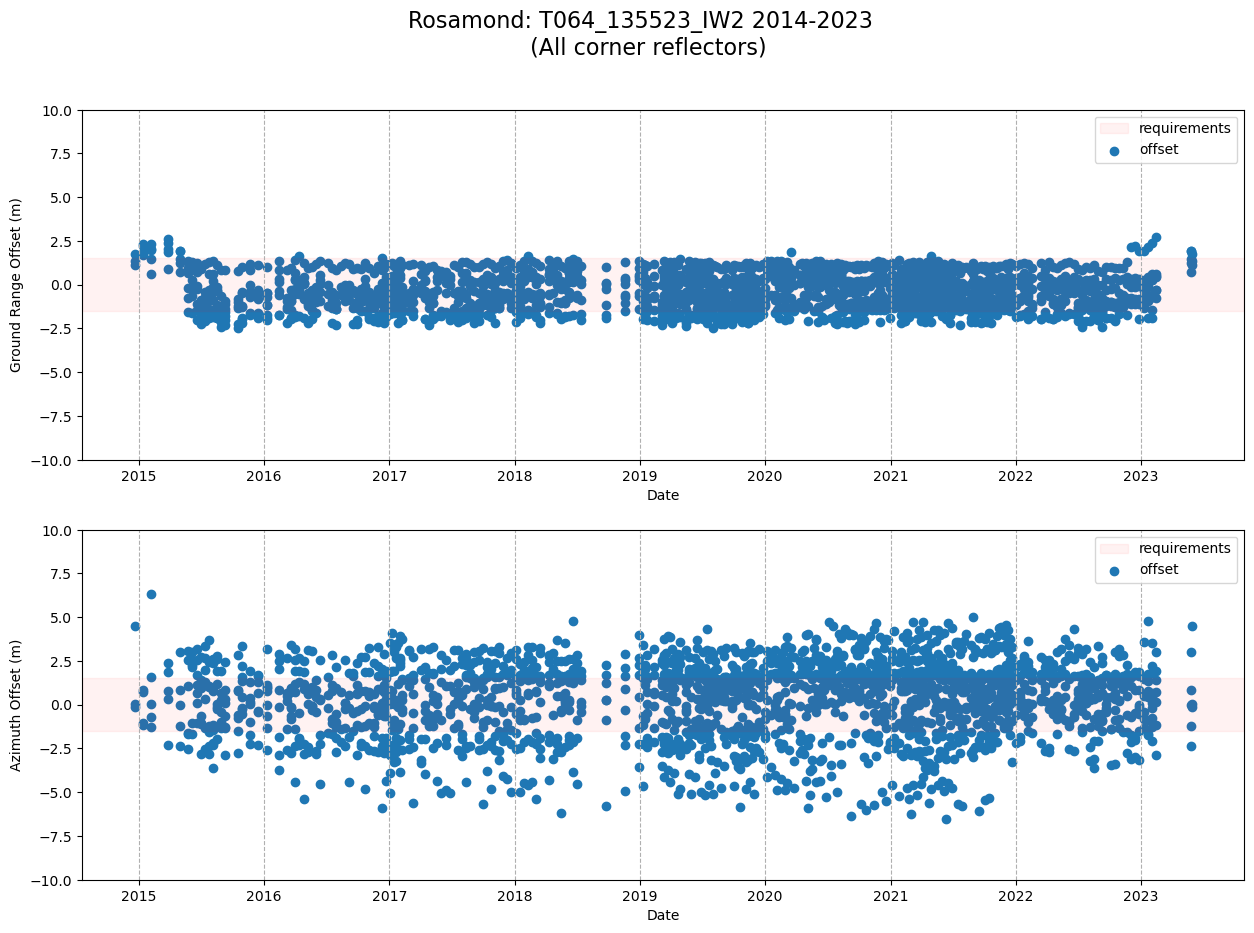

In [8]:
# Plot results
fig, ax = plt.subplots(2,1,figsize=(15,10))

gr_req = ax[0].axhspan(-1.5,1.5,color='red', alpha=0.05, zorder=1, label='requirements')
gr_offset = ax[0].scatter(df['Date'],df['ALE_GRg'],marker='o',zorder=0, label='offset')
ax[0].set_xlabel('Date')
ax[0].set_ylim(-10,10)
ax[0].grid(axis='x',linestyle='--')
ax[0].set_ylabel('Ground Range Offset (m)')
ax[0].legend()

az_req = ax[1].axhspan(-1.5,1.5,color='red', alpha=0.05, zorder=1, label='requirements')
az_offset = ax[1].scatter(df['Date'],df['ALE_Az'],marker='o',zorder=0, label='offset')
ax[1].set_xlabel('Date')
ax[1].set_ylim(-10,10)
ax[1].grid(axis='x',linestyle='--')
ax[1].set_ylabel('Azimuth Offset (m)')
ax[1].legend()
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (All corner reflectors)", fontsize=16)
fig.savefig(f'{save_dir}/summary/ALE_ts_grazi_all.png',dpi=300,bbox_inches='tight')

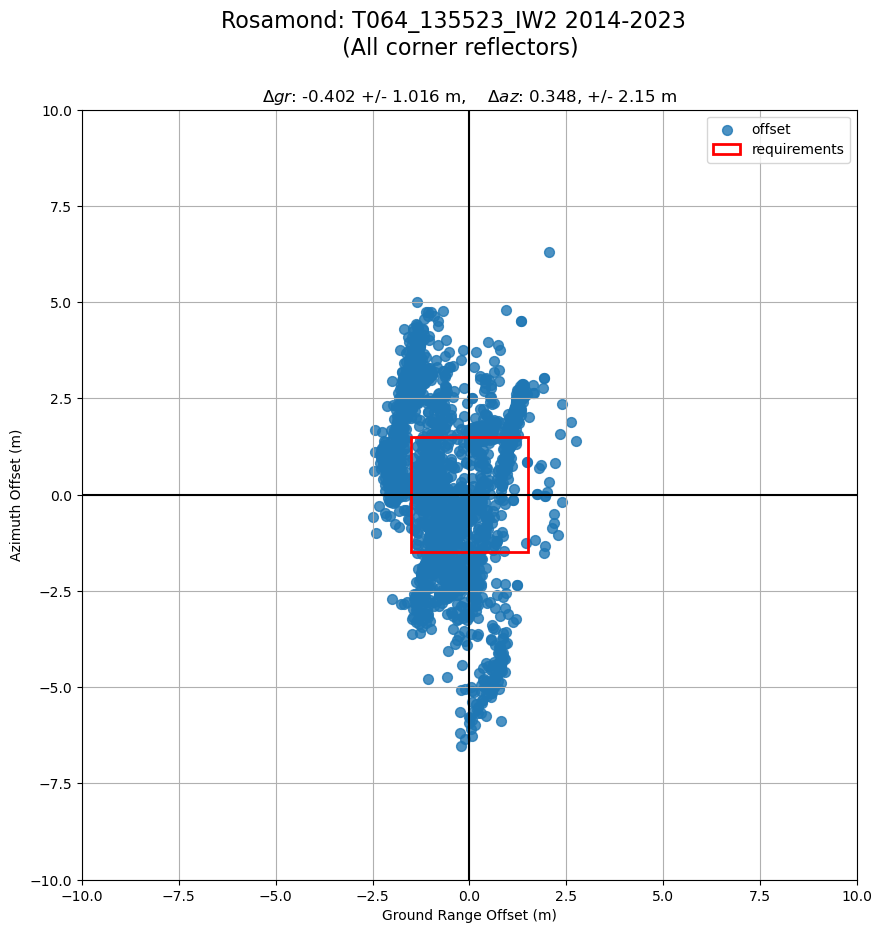

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
rect = patches.Rectangle((-1.5, 1.5), 3, -3, linewidth=2, edgecolor='r', facecolor='none', label='requirements')  #OPERA ALE requirements
offset = ax.scatter(df['ALE_GRg'], df['ALE_Az'], s=50, alpha=0.8, zorder=0, label='offset')
ax.grid(True)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title(f'$\Delta gr$: {np.round(df["ALE_GRg"].mean(),3)} +/- {np.round(df["ALE_GRg"].std(),3)} m, \
   $\Delta az$: {np.round(df["ALE_Az"].mean(),3)}, +/- {np.round(df["ALE_Az"].std(),3)} m')
ax.set_xlabel('Ground Range Offset (m)')
ax.set_ylabel('Azimuth Offset (m)')
ax.add_patch(rect)
ax.legend()
nl = '\n'
fig.suptitle(f"{cr_network}: {burst_id.upper()} 2014-2023 {nl} (All corner reflectors)", fontsize=16)
fig.savefig('ALE_graz_all.png',dpi=300,bbox_inches='tight')
fig.savefig(f'{save_dir}/summary/ALE_grazi_all.png',dpi=300,bbox_inches='tight')